# AI & ML Internship – Task 2  
## Data Cleaning & Missing Value Handling (Advanced)

**Dataset Used:** Housing Dataset  
**Tools Used:** Python, Pandas, NumPy, Matplotlib, Seaborn, Jupyter Notebook  

### Objective  
To perform advanced data cleaning, missing value handling, visualization, and quality analysis to make the dataset fully machine-learning ready.


In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [32]:

# Load dataset
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



## 1. Dataset Overview
Understanding the shape, columns, and basic structure of the dataset.


In [33]:

df.shape


(545, 13)

In [34]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB



## 2. Missing Value Analysis
Identify and quantify missing values in each column.


In [35]:

missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)


### Missing Values Visualization
A bar chart showing missing values per column.


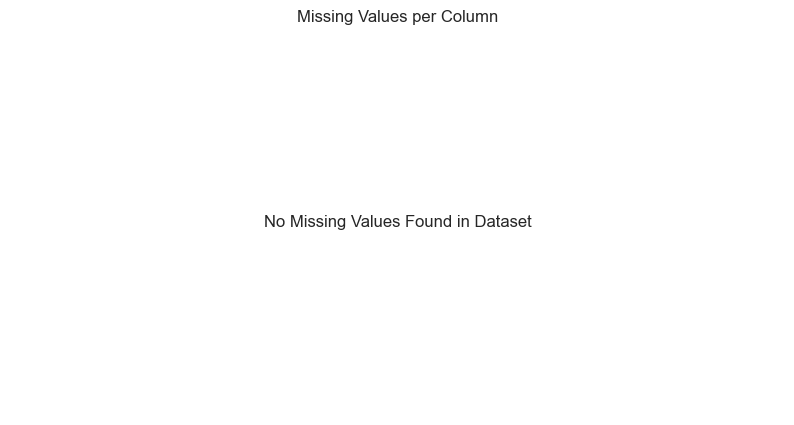

In [36]:
missing_plot_data = missing_values[missing_values > 0]

plt.figure(figsize=(10,5))

if missing_plot_data.empty:
    plt.text(0.5, 0.5, 
             "No Missing Values Found in Dataset", 
             ha='center', va='center', fontsize=12)
    plt.axis('off')
else:
    missing_plot_data.plot(kind='bar')
    plt.ylabel("Count")

plt.title("Missing Values per Column")
plt.show()



## 3. Percentage of Missing Values
Helps in deciding whether to drop or impute columns.


In [37]:

missing_percent = (missing_values / len(df)) * 100
missing_percent[missing_percent > 0]


Series([], dtype: float64)


## 4. Dropping Columns with Extremely High Missing Values
Columns with more than 40% missing values are removed.


In [38]:

threshold = 40
cols_to_drop = missing_percent[missing_percent > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop


Index([], dtype='object')


## 5. Handling Missing Values (Imputation)



### Numerical Features – Median Imputation  
Median is preferred as it is robust to outliers.


In [39]:

num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)



### Categorical Features – Mode Imputation


In [40]:

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



## 6. Validation After Cleaning
Ensure no missing values remain.


In [41]:

df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## 7. Advanced Data Quality Analysis



### Distribution of Numerical Features


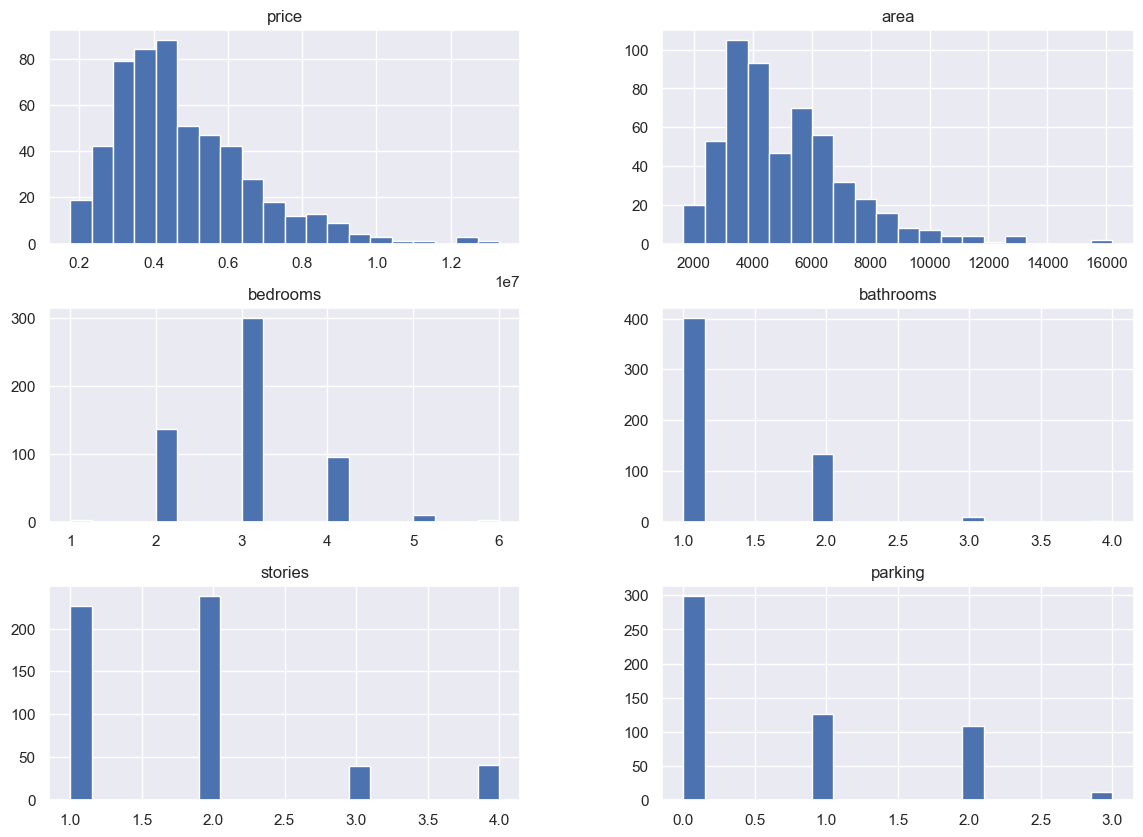

In [42]:

df[num_cols].hist(figsize=(14,10), bins=20)
plt.show()



### Correlation Heatmap


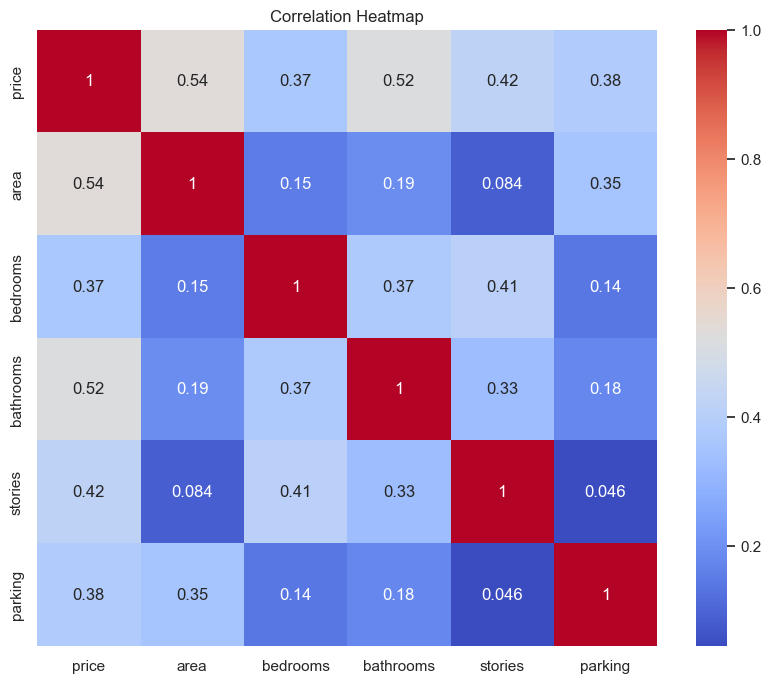

In [43]:

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



## 8. Outlier Detection (IQR Method)


In [44]:

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers


price        15
area         12
bedrooms     12
bathrooms     1
stories      41
parking      12
dtype: int64


## 9. Before vs After Cleaning Summary


In [45]:

print("Final dataset shape:", df.shape)


Final dataset shape: (545, 13)



## 10. Save Cleaned Dataset


In [46]:

df.to_csv("Housing_cleaned.csv", index=False)



## Final Conclusion
The Housing dataset was successfully cleaned using systematic missing value analysis, imputation strategies, and data quality checks. Advanced visualizations and correlation analysis provide deeper insights, making the dataset fully prepared for machine learning tasks.
